In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from polyglot.detect import Detector
from polyglot.text import Text
from utils import get_config
from sqlalchemy import create_engine
from textblob import TextBlob as tb
from textblob_fr import PatternTagger, PatternAnalyzer

In [27]:
def detect_lang(text):
  try:
    detect = Detector(text)
    return detect.language.code
  except Exception:
    return None

def get_polarity(text):
  lang = detect_lang(text)
  text_analysed = Text(text, hint_language_code=lang)
  try:
    return text_analysed.polarity
  except Exception:
    return None

def get_subjectivity(text):
  lang = detect_lang(text)
  blob = tb(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
  if lang == "en":
    try:
      return tb(text).sentiment.subjectivity
    except Exception:
      return None
  elif lang == "fr":
    try:
      return blob.sentiment[1]
    except Exception:
      return None
  else:
    return None

def get_eligibility(x):
  return "eligible" if x==1 else "non-eligible"
      
def get_analysis(score):
  if score < 0:
    return "Negatif"
  elif score == 0:
    return "Neutre"
  else:
    return "Positif"
  
def get_analysis2(score):
  if score <= 0.5:
    return "Objectif"
  elif score > 0.5:
    return "Subjectif"
  else:
    return None

In [17]:
engine = create_engine(get_config('mysql'))

In [18]:
df = pd.read_sql("Select * from Result;", engine)

In [25]:
df = df.dropna()
df

username                               course_id  grade  \
16      __Baptiste__  course-v1:MinesTelecom+04026+session02   0.00   
17            __Eric            MinesTelecom/04017/session01   0.98   
18       __florent__  course-v1:MinesTelecom+04017+session04   0.00   
19      __frederic__  course-v1:MinesTelecom+04017+session03   0.00   
20      __frederic__  course-v1:MinesTelecom+04017+session04   0.00   
...              ...                                     ...    ...   
113168        ZZOHRA         MinesTelecom/04021S02/session02   0.00   
113169         Zzyzx         MinesTelecom/04017S02/session02   0.00   
113170         Zzyzx         MinesTelecom/04018S02/session02   0.00   
113171     ZzZiiiOoO            MinesTelecom/04018/session01   0.00   
113172         zzzzj  course-v1:MinesTelecom+04026+session03   0.04   

        eligibility  
16              0.0  
17              0.0  
18              0.0  
19              0.0  
20              0.0  
...             ...  
113168          0.0  
113169          0.0  
113170          0.0  
113171          0.0  
113172          0.0  

[113157 rows x 4 columns]

<AxesSubplot: xlabel='grade', ylabel='Count'>

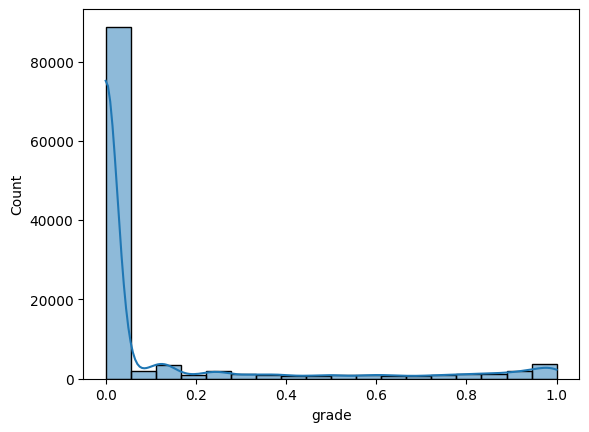

In [20]:
sns.histplot(df['grade'], kde=True)

In [28]:
df['eligibility'] = df['eligibility'].apply(get_eligibility)

In [29]:
color = sns.color_palette('bright')
plt.pie(df['eligibility'].value_counts(),labels=['non eligible', 'eligible'], colors=color, autopct='%.0f%%')
plt.show()

Aalysis

In [8]:
df_grade = pd.read_sql("Select grade, count(*) AS N from g3_MOOC.`Result` r GROUP BY grade;", engine)

In [13]:
df_grade = df_grade.dropna()
df_grade

grade      N
0     0.00  87774
1     0.50    370
2     0.98    862
3     0.13   1895
4     0.60    401
..     ...    ...
96    0.02     15
97    0.32     35
98    0.41     28
99    0.34     18
100   0.46     25

[101 rows x 2 columns]

<AxesSubplot:xlabel='grade', ylabel='N'>

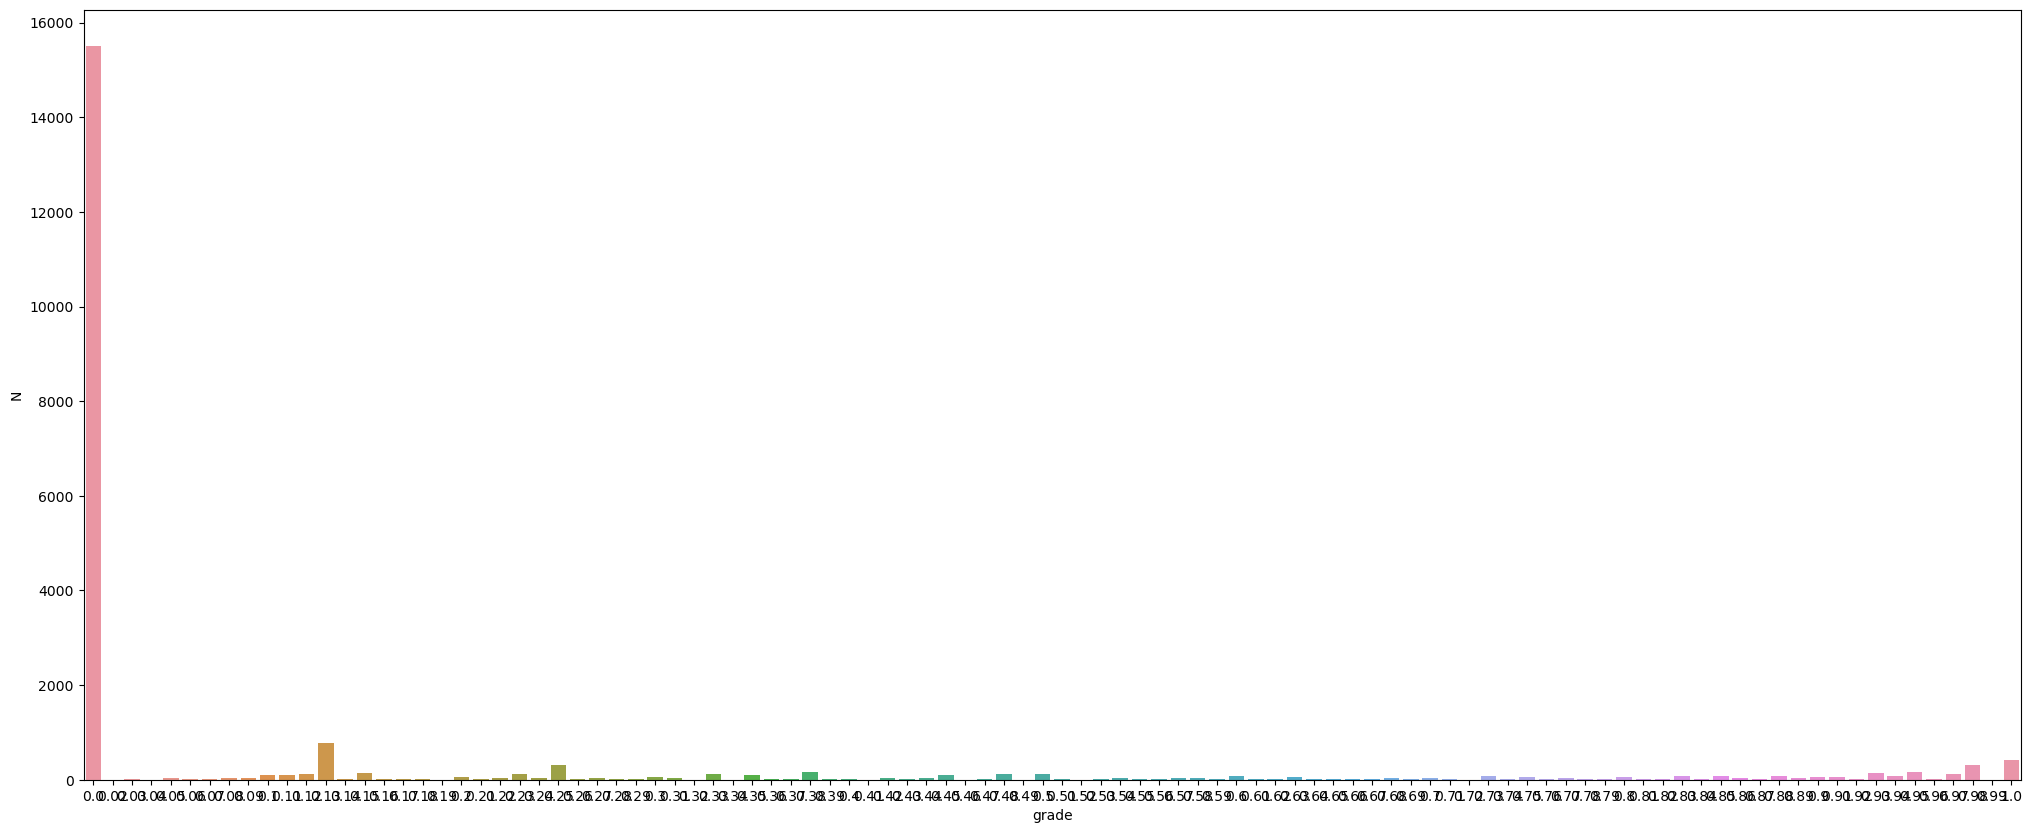

In [10]:
plt.figure(figsize=(25,10))
sns.barplot(data=df_grade, x="grade", y="N")

In [18]:
df_grade['catgory'] = pd.cut(df_grade.grade, bins=5, ordered=True)
df_grade

grade      N        catgory
0     0.00  87774  (-0.001, 0.2]
1     0.50    370     (0.4, 0.6]
2     0.98    862     (0.8, 1.0]
3     0.13   1895  (-0.001, 0.2]
4     0.60    401     (0.4, 0.6]
..     ...    ...            ...
96    0.02     15  (-0.001, 0.2]
97    0.32     35     (0.2, 0.4]
98    0.41     28     (0.4, 0.6]
99    0.34     18     (0.2, 0.4]
100   0.46     25     (0.4, 0.6]

[101 rows x 3 columns]

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_grade, x="grade", y="catgory")

<AxesSubplot:xlabel='grade', ylabel='catgory'>

<AxesSubplot:ylabel='grade'>

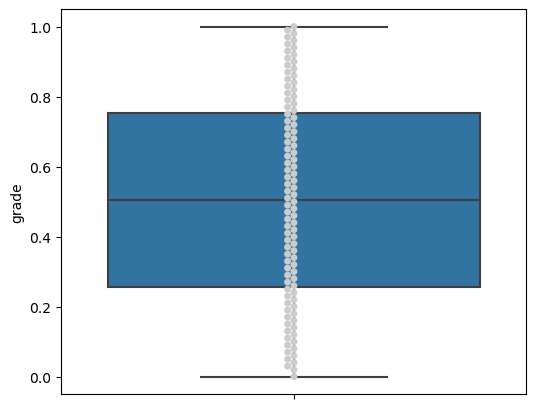

In [32]:
fig, axs = plt.subplots(figsize=(6, 5))

sns.boxplot(data=df_grade, y="grade")
sns.swarmplot(data=df_grade, y="grade", color=".8")

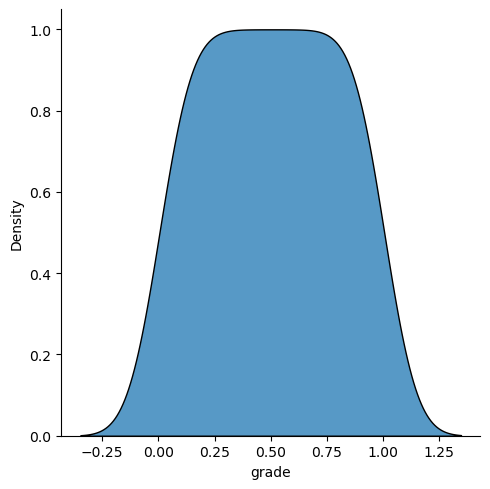

In [35]:
sns.displot(df_grade, x="grade", kind="kde", multiple="stack")

In [3]:
df = pd.read_csv('reussite_regre.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df

username                     course_id  \
97      alazak  MinesTelecom/04017/session01   
98      alazak  MinesTelecom/04017/session01   
99      alazak  MinesTelecom/04017/session01   
100     alazak  MinesTelecom/04017/session01   
101     alazak  MinesTelecom/04017/session01   
...        ...                           ...   
24580    ttran  MinesTelecom/04017/session01   
24581    ttran  MinesTelecom/04017/session01   
24582    ttran  MinesTelecom/04017/session01   
24583    ttran  MinesTelecom/04017/session01   
24584    ttran  MinesTelecom/04017/session01   

                                                    body  polarity  \
97     Concernant le premier programme, la LED s'allu...  0.333333   
98     Concernant le premier programme, la LED s'allu...  0.333333   
99     Concernant le premier programme, la LED s'allu...  0.333333   
100    Concernant le premier programme, la LED s'allu...  0.333333   
101    Concernant le premier programme, la LED s'allu...  0.333333   
...                                                  ...       ...   
24580  Merci beaucoup pour vos explications, je pense... -1.000000   
24581  Est-ce qu'une résistance doit être placé oblig...  0.142857   
24582  Merci beaucoup pour vos explications, je pense... -1.000000   
24583  Est-ce qu'une résistance doit être placé oblig...  0.142857   
24584  Merci beaucoup pour vos explications, je pense... -1.000000   

       subjectivity  grade  eligibility country gender education_level  
97         0.220000   0.27            0      MA      f               p  
98         0.220000   0.00            0      MA      f               p  
99         0.220000   0.00            0      MA      f               p  
100        0.220000   0.00            0      MA      f               p  
101        0.220000   0.45            0      MA      f               p  
...             ...    ...          ...     ...    ...             ...  
24580      0.433333   0.67            1      FR      m               m  
24581      0.287500   0.00            0      FR      m               m  
24582      0.433333   0.00            0      FR      m               m  
24583      0.287500   0.00            0      FR      m               m  
24584      0.433333   0.00            0      FR      m               m  

[197 rows x 10 columns]

<AxesSubplot:xlabel='country', ylabel='grade'>

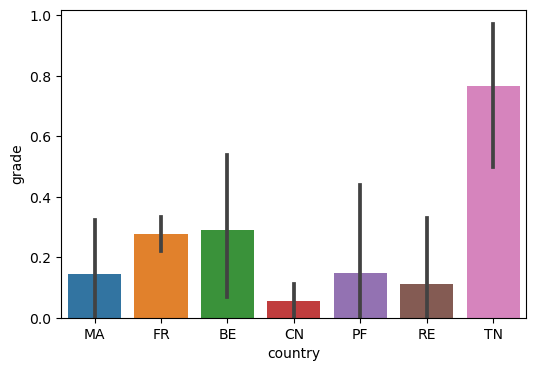

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="country", y="grade")

<AxesSubplot:xlabel='education_level', ylabel='grade'>

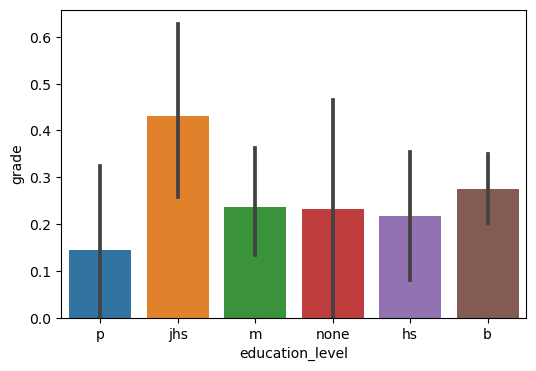

In [30]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="education_level", y="grade")

/home/fengfeng/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='gender', ylabel='grade'>

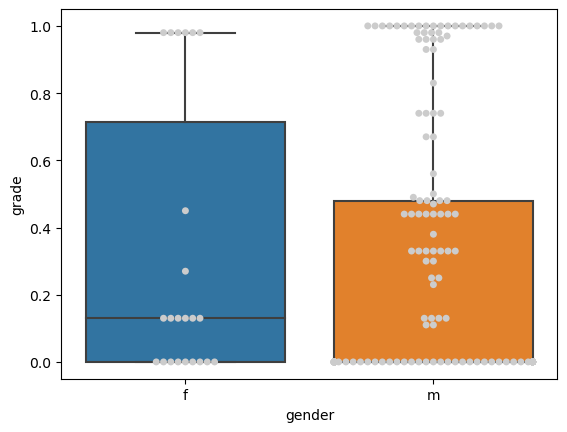

In [34]:
sns.boxplot(data=df, x="gender", y="grade")
sns.swarmplot(data=df, x="gender", y="grade", color=".8")

/home/fengfeng/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/fengfeng/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


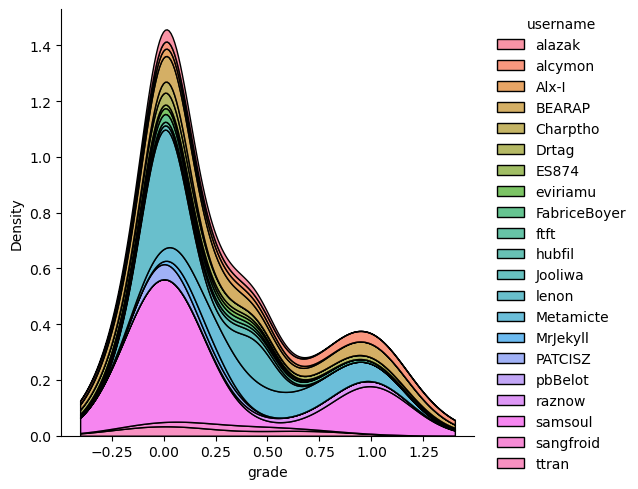

In [36]:
sns.displot(df, x="grade", hue="username", kind="kde", multiple="stack")

<AxesSubplot:>

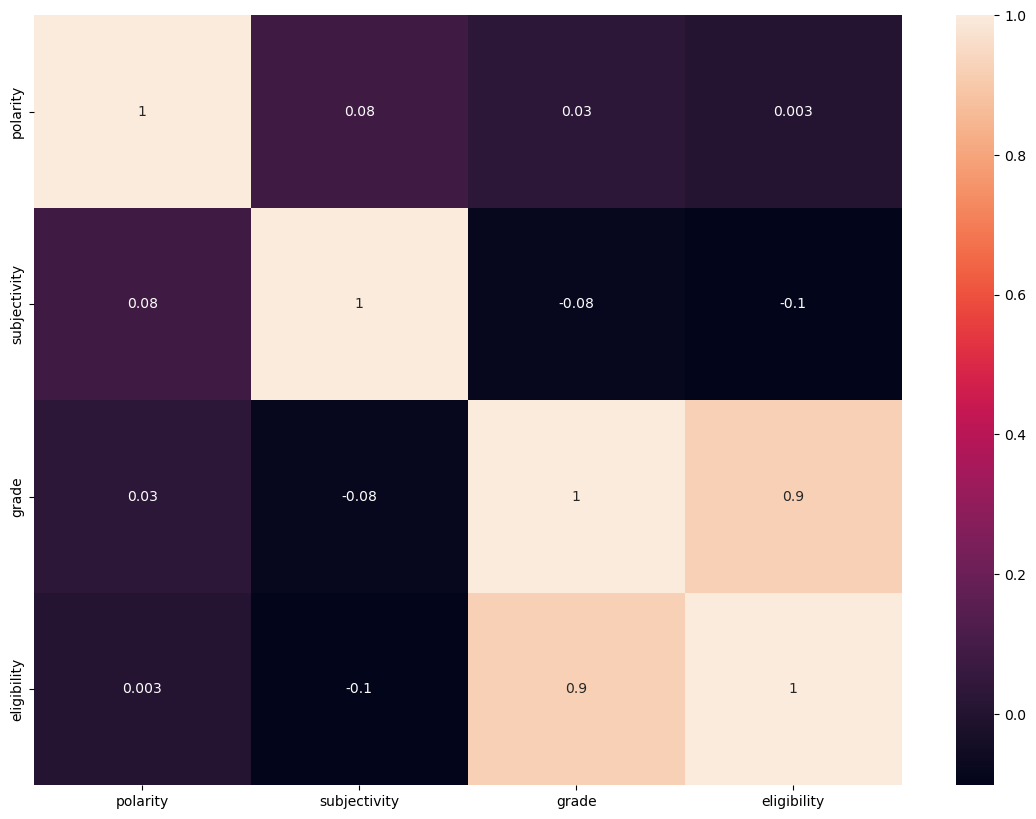

In [5]:

plt.figure(figsize=(14,10))
sns.heatmap(data=df.select_dtypes(include=['float64', 'int64']).dropna().corr(), annot=True, fmt='.1g')